In [1]:
from google.colab import files
uploaded = files.upload()

Saving 100000 Sales Records.xlsx to 100000 Sales Records.xlsx


In [2]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans, DBSCAN, Birch, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_excel('100000 Sales Records.xlsx')

# Extract relevant columns for analysis
columns_for_clustering = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
X = df[columns_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Mini-Batch K-Means
kmeans_model = MiniBatchKMeans(n_clusters=3, random_state=42)
df['KMeans_Labels'] = kmeans_model.fit_predict(X_scaled)

# DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Labels'] = dbscan_model.fit_predict(X_scaled)

# Birch
birch_model = Birch(n_clusters=3)
df['BIRCH_Labels'] = birch_model.fit_predict(X_scaled)

# OPTICS
optics_model = OPTICS(min_samples=5)
df['OPTICS_Labels'] = optics_model.fit_predict(X_scaled)

# Evaluate clustering performance
# K-Means
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Labels'])
db_score_kmeans = davies_bouldin_score(X_scaled, df['KMeans_Labels'])
print("K-Means - Silhouette Score:", silhouette_kmeans)
print("K-Means - Davies-Bouldin Score:", db_score_kmeans)

# DBSCAN
silhouette_dbscan = silhouette_score(X_scaled, df['DBSCAN_Labels'])
db_score_dbscan = davies_bouldin_score(X_scaled, df['DBSCAN_Labels'])
print("DBSCAN - Silhouette Score:", silhouette_dbscan)
print("DBSCAN - Davies-Bouldin Score:", db_score_dbscan)

# Birch
silhouette_birch = silhouette_score(X_scaled, df['BIRCH_Labels'])
db_score_birch = davies_bouldin_score(X_scaled, df['BIRCH_Labels'])
print("BIRCH - Silhouette Score:", silhouette_birch)
print("BIRCH - Davies-Bouldin Score:", db_score_birch)

# OPTICS
silhouette_optics = silhouette_score(X_scaled, df['OPTICS_Labels'])
db_score_optics = davies_bouldin_score(X_scaled, df['OPTICS_Labels'])
print("OPTICS - Silhouette Score:", silhouette_optics)
print("OPTICS - Davies-Bouldin Score:", db_score_optics)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


K-Means - Silhouette Score: 0.3695019720920291
K-Means - Davies-Bouldin Score: 0.9654515240451911
DBSCAN - Silhouette Score: 0.36552697822691277
DBSCAN - Davies-Bouldin Score: 1.6128927385031355
BIRCH - Silhouette Score: 0.44170603492431093
BIRCH - Davies-Bouldin Score: 0.8228700843656583
OPTICS - Silhouette Score: 0.2518290519182678
OPTICS - Davies-Bouldin Score: 1.293987268840052


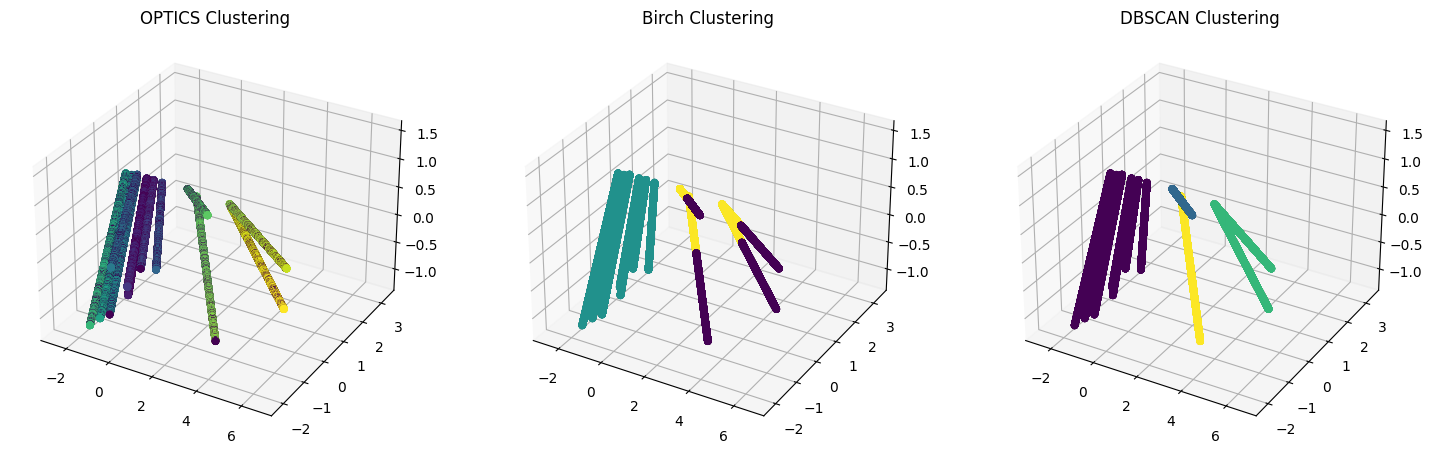

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extend PCA to three dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Plot 3D graphs for OPTICS, Birch, and DBSCAN
fig = plt.figure(figsize=(18, 6))

# OPTICS
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=df['OPTICS_Labels'], cmap='viridis')
ax1.set_title('OPTICS Clustering')

# Birch
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=df['BIRCH_Labels'], cmap='viridis')
ax2.set_title('Birch Clustering')

# DBSCAN
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=df['DBSCAN_Labels'], cmap='viridis')
ax3.set_title('DBSCAN Clustering')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

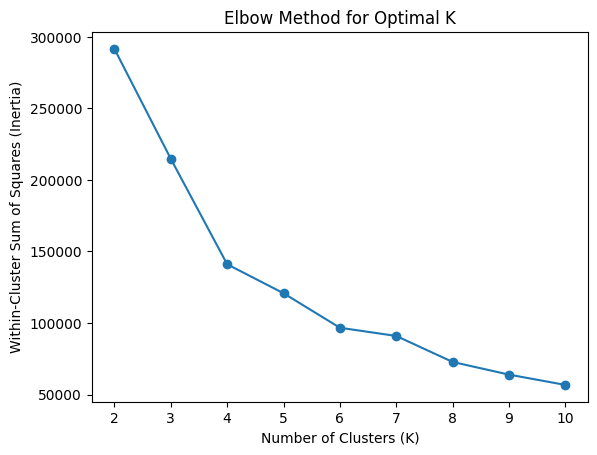

In [4]:
import matplotlib.pyplot as plt
inertia = []
for k in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


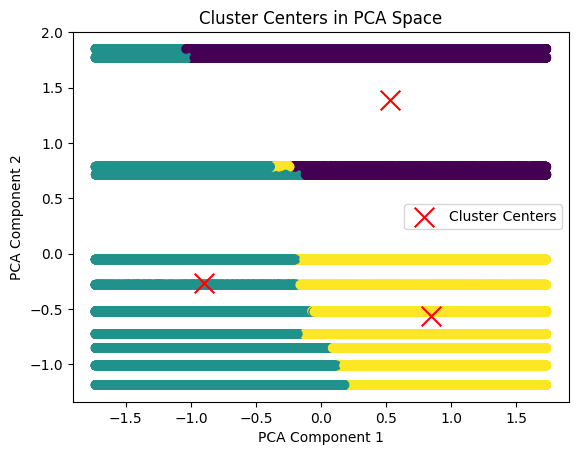

In [7]:
#Cluster centers

cluster_centers = kmeans_model.cluster_centers_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['KMeans_Labels'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Centers in PCA Space')
plt.legend()
plt.show()


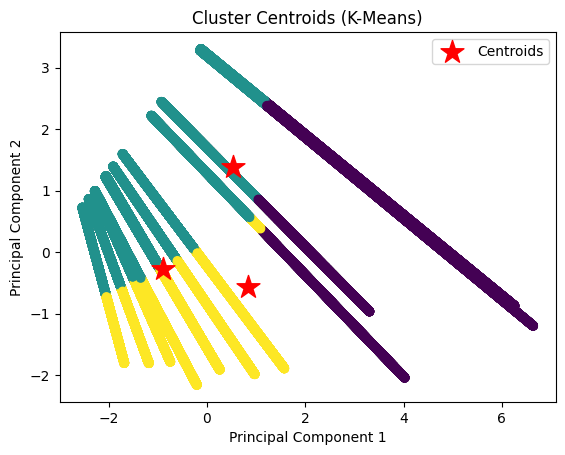

In [11]:
centroids = kmeans.cluster_centers_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Centroids (K-Means)')
plt.legend()
plt.show()


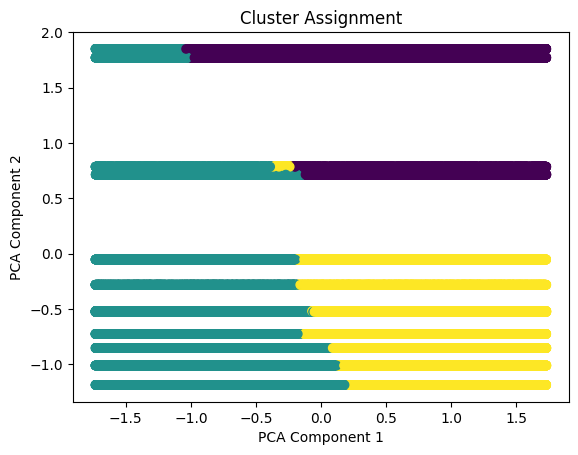

In [8]:
#Cluster allignment


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['KMeans_Labels'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Assignment')
plt.show()


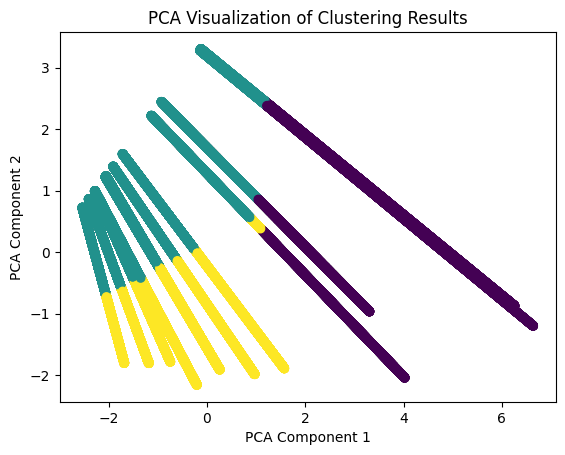

In [9]:
#PCA Visualisation

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Labels'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clustering Results')
plt.show()


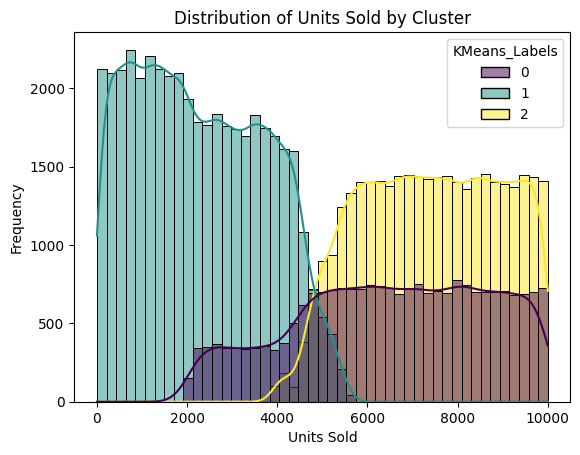

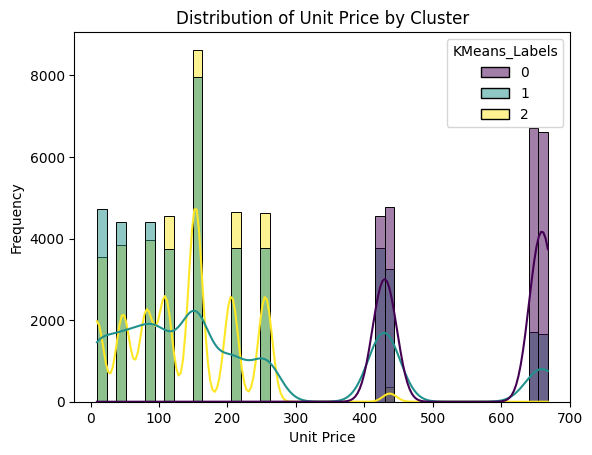

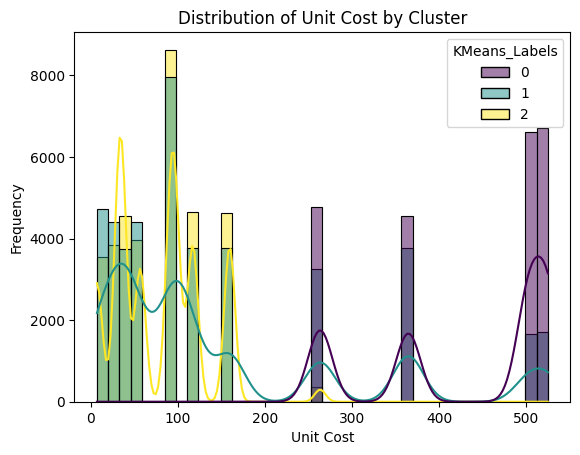

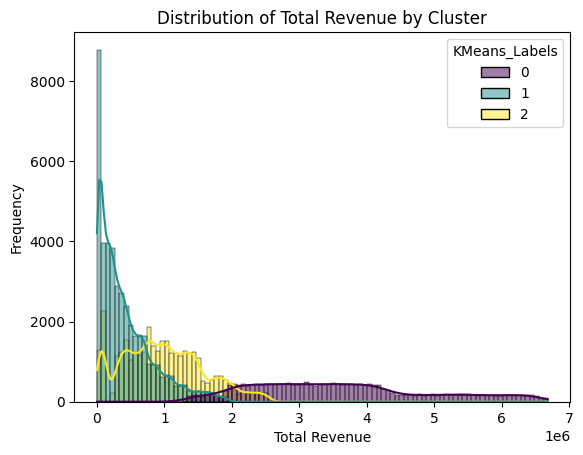

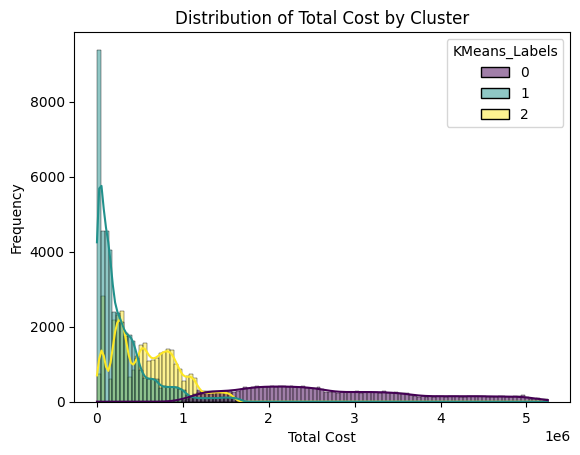

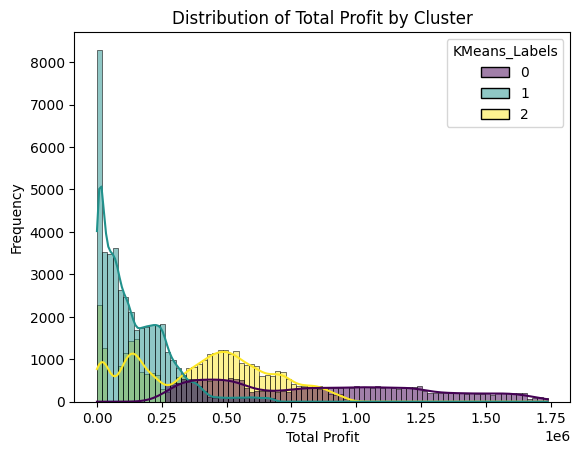

In [10]:
# Distribution plots

import seaborn as sns
for column in columns_for_clustering:
    sns.histplot(data=df, x=column, hue='KMeans_Labels', kde=True, palette='viridis')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()
